In [1]:
from pyuvdata import UVData
import numpy as np
import matplotlib.pyplot as plt

In [97]:
def plotpols(wf,phs=True,flags=None):
    if phs:
        toplot = np.angle(wf)
    else:
        toplot = np.log10(np.abs(wf))
            
    if flags is not None:
        toplot /= ~flags
            
    pos = ['221','222','223','224']
    plt.figure(figsize=(15,8))
    for ip,p in enumerate(pos):
        plt.subplot(p)
        plt.imshow(toplot[:,0,:,ip],aspect='auto')
    plt.show()       

In [2]:
path = '/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458098/'
prefix = 'zen.2458098.22991.HH.'

In [3]:
raw = UVData()
raw.read(path+prefix+'uvh5')

In [4]:
ocrsd = UVData()
ocrsd.read(path+prefix+'OCRSD.uvh5')

In [41]:
raw.antenna_numbers

array([136, 140, 121,  88,  41,  86,  36,  51,  50,  98, 123, 124,  65,
       137,  82, 120, 143,  66,  83, 122,  67,  68,  69,  70,  71,  85,
         0,   1,  11,  12,  13,  14,   2,  23,  24,  25,  26,  27,  37,
        38,  39,  40,  52,  53,  54,  55,  84,  87, 141, 138, 142, 139])

In [50]:
bl = (66,83)

In [51]:
raw1 = raw.select(bls=bl,inplace=False)

In [52]:
ocrsd1 = ocrsd.select(bls=bl,inplace=False)

divide by zero encountered in true_divide
invalid value encountered in true_divide


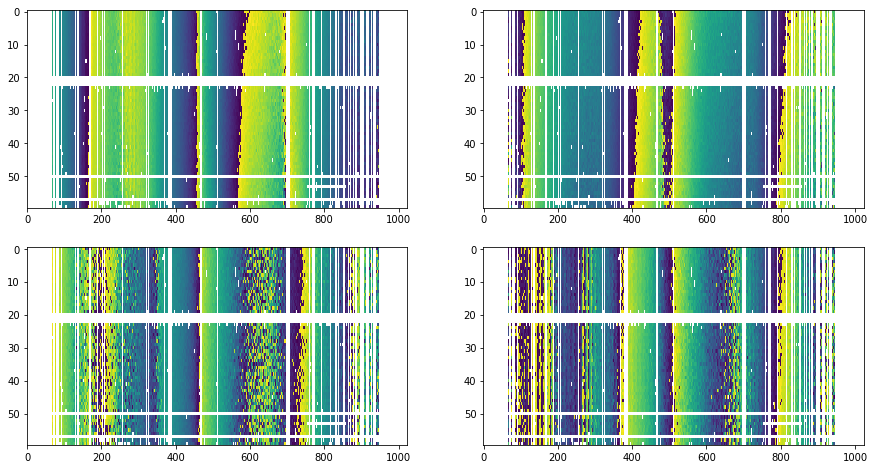

In [100]:
plotpols(raw1.data_array,flags=ocrsd1.flag_array,phs=True)

divide by zero encountered in true_divide
invalid value encountered in true_divide


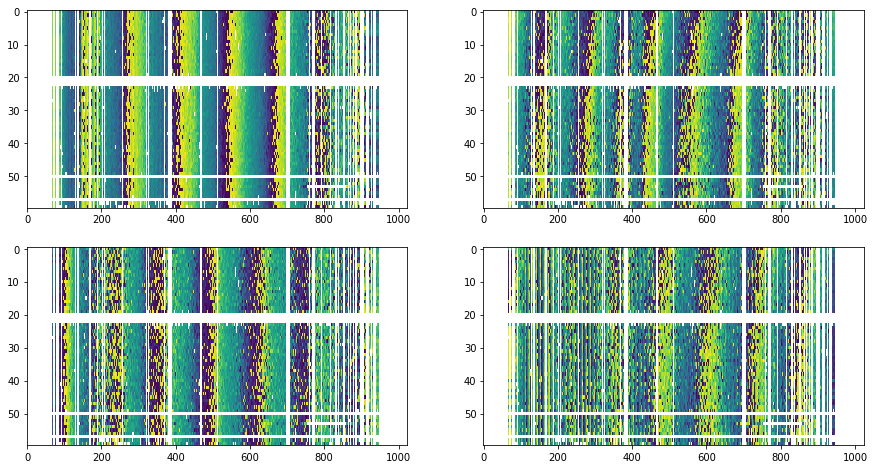

In [99]:
plotpols(ocrsd1.data_array, flags=ocrsd1.flag_array, phs=True)

In [46]:
ocrsd1.data_array.max()

0j

I think this might do what I want: grab a raw file, calibrate it if a calfile is present, and clean in, writing out the clean bits.  From https://github.com/HERA-Team/hera_cal/blob/master/hera_cal/delay_filter.py

In [64]:
from hera_cal import io

In [79]:
from hera_cal.delay_filter import DelayFilter

In [81]:
raw.Nbls

1378

In [118]:
# Make a raw, flagged file
from copy import deepcopy
raw_flagged = deepcopy(raw)
raw_flagged.flag_array = ocrsd.flag_array
raw_flagged_filename = output_path + prefix + 'raw_flagged.uvh5'
raw_flagged.write_uvh5(raw_flagged_filename)

In [115]:
raw_flagged1 = raw_flagged.select(bls=bl,inplace=False)

divide by zero encountered in log10


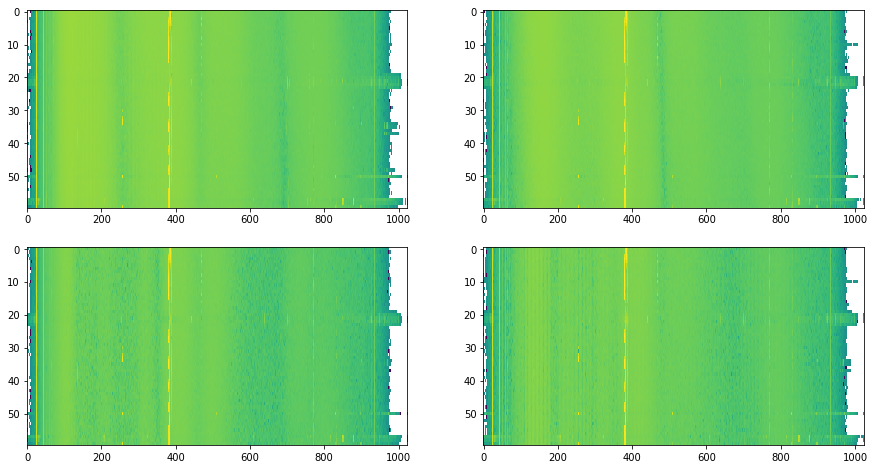

In [116]:
plotpols(raw1.data_array, flags = raw1.flag_array, phs=False)

divide by zero encountered in log10
divide by zero encountered in true_divide


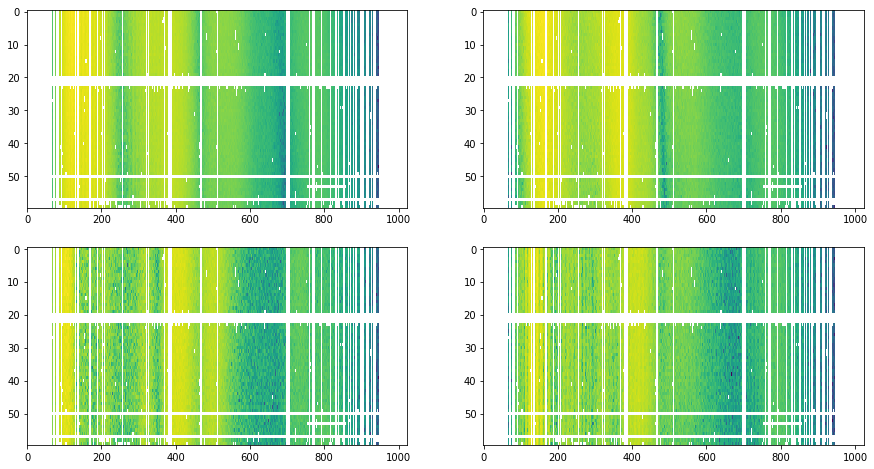

In [117]:
plotpols(raw_flagged1.data_array, flags = raw_flagged1.flag_array, phs=False)

In [119]:
infilename = raw_flagged_filename #path+prefix+'uvh5'
calfile = path+prefix+'reflections.calfits'
Nbls=100

In [120]:
output_path = '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/'
res_outfilename = output_path + prefix + 'res.uvh5'
CLEAN_outfilename = output_path + prefix + 'clean.uvh5'
filled_outfilename = output_path + prefix + 'filled.uvh5'

In [121]:
hd = io.HERAData(infilename, filetype='uvh5')

In [122]:
if calfile is not None:
    calfile = io.HERACal(calfile)
    calfile.read()

In [124]:
%%time
# loop over all baselines in increments of Nbls
for i in range(0, len(hd.bls), Nbls):
    print(i)
    df = DelayFilter(hd, input_cal=calfile)
    df.read(bls=hd.bls[i:i + Nbls])
    df.run_filter(standoff = 15, horizon = 1, tol = 1e-9, window = "tukey", skip_wgt = 0.1, maxiter = 100, alpha = 0.5)
    df.write_filtered_data(res_outfilename=res_outfilename, CLEAN_outfilename=CLEAN_outfilename,
                           filled_outfilename=filled_outfilename, partial_write=True,
                           clobber=True) #, add_to_history=add_to_history)
    df.hd.data_array = None  # this forces a reload in the next loop

0


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


File exists; clobbering


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


File exists; clobbering


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


100


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


200


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


300


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


400


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


500


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


600


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


700


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


800


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


900


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


1000


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


1100


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


1200


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


1300


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


1400


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


1500


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


1600


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


1700


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


1800


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


1900


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


2000


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


2100


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


2200


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


2300


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


2400


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


2500


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


2600


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


2700


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


2800


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


2900


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


3000


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


3100


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


3200


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


3300


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


3400


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


3500


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


3600


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


3700


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


3800


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


3900


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


4000


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


4100


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


4200


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


4300


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


4400


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


4500


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


4600


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


4700


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


4800


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


4900


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


5000


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


5100


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


5200


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


5300


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


5400


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


5500


Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types
Selected polarization values are not evenly spaced. This will make it impossible to write this data out to some file types


CPU times: user 5h 30min 15s, sys: 22min 36s, total: 5h 52min 52s
Wall time: 2h 32min 3s


This ... didn't work, because I didn't have any flags.  Dammit.

In [125]:
clean = UVData()
clean.read(CLEAN_outfilename)

In [126]:
clean1 = clean.select(bls=bl,inplace=False)

divide by zero encountered in true_divide


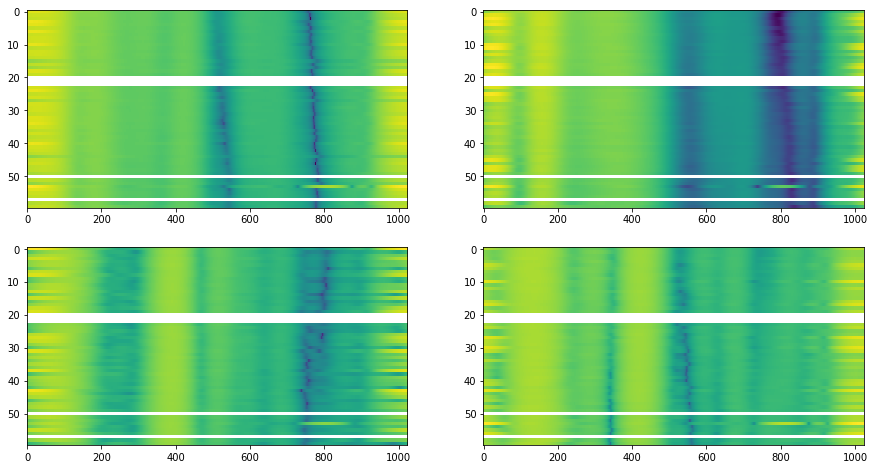

In [127]:
plotpols(clean1.data_array, flags = clean1.flag_array, phs=False)

divide by zero encountered in log10
divide by zero encountered in true_divide


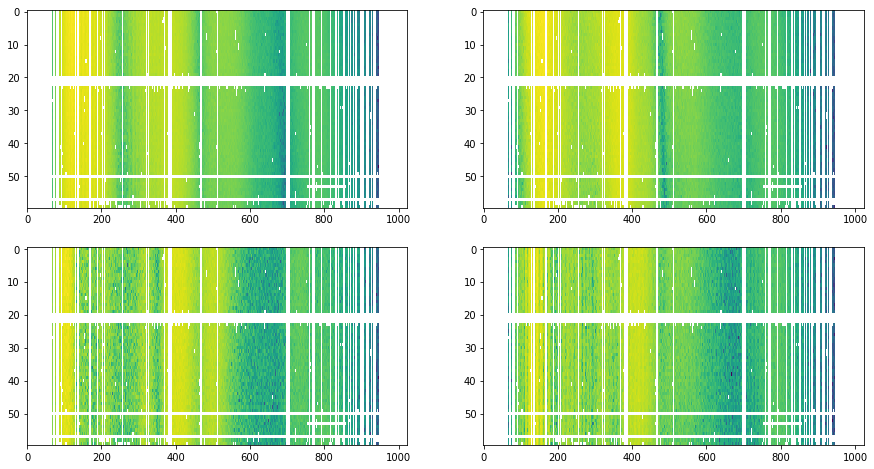

In [129]:
plotpols(raw_flagged1.data_array, flags = raw_flagged1.flag_array, phs=False)

In [130]:
raw.data_array.shape

(82680, 1, 1024, 4)

In [131]:
raw.reorder_blts()

In [132]:
raw.data_array.shape

(82680, 1, 1024, 4)

In [133]:
raw.time_array.shape

(82680,)

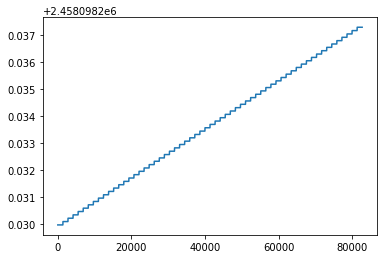

In [134]:
plt.plot(raw.time_array)